***
<br><br>
<h1>CLV: Aggregated Model (Modelo Agregado)</h1>
<em>Customer Intelligence</em><br><br>

Author: Daniel Torres - Data Scientist <br>

<br><br>
***

#### Overview

The CLV will be calculated using the average revenue per customer based on historical transactional data.

Assumptions: Constant average spend and the same churn rate for all customers.

This method does not differentiate between clients and produces a single value for CLV at the global level. Later we will improve this estimate by making models for each axis of value, interest, etc. and their combinations.


##### Spanish
Se calculará el CLV utilizando el ingreso promedio por cliente basado data transaccional histórica. 

Supuestos: Gasto promedio constante y una misma tasa de abandono para todos los clientes.

Este método no diferencia entre clientes y produce un valor único para CLV a nivel general. Posteriormente mejoraremos esta estimación realizando modelos para cada eje de valor, interes, etc y sus combinaciones. 

<br><br>

In [1]:
# Importing main database management packages
# Importantdo principales paquetes de manejo de BD 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
from pandas.io import gbq
import pickle
import time
import warnings
warnings.filterwarnings('ignore')
from itertools import product
from tqdm import tqdm_notebook
from datetime import datetime, timedelta

In [2]:
# Setting the ETL function

def ETL_process(query, ndf):#, f_ini, f_fin):
    print('La data se extraerá desde el {} hasta el {}')#.format(f_ini, f_fin))
    # Definir parámetros
    location = 'US'
    project = 'sample_data'
    # Establecer conexión a Big query
    client = bigquery.Client(location = location, project = project)
    print("Se ha establecido la conexión a bigquery para el proyecto {}".format(client.project))
    # Configura para leer data por lotes y así evitar la expulsión por time out
    job_config = bigquery.QueryJobConfig(priority = bigquery.QueryPriority.BATCH) # para jalar mas de 50MM
    # Query para obtener la dara
    query = query#.format(f_ini, f_fin)
    print('Extrayendo la data...')
    # Extraer la data
    query_job = client.query(query, location=location, job_config=job_config)
    # Chequear el progreso de la extracción. Una vez que termine, los datos ya han sido leídos.
    query_job = client.get_job(query_job.job_id, location=location)

    # Convertir a un dataframe de pandas la data leída.
    rows = query_job.result()
    df = gbq.read_gbq(query, project_id=project)
    print('Guardando data ...')
    df.to_csv('Data/{}.dat'.format(ndf), index = False)
    return df

In [3]:
# SQL query with the name of the table we'll extract

query = """ SELECT * FROM DS_ANALYTICS.dtc_tabla_CLV_TT  """

In [ ]:
# Extracting the data

%%time
df_result = ETL_process(query, 'results_11_MM')    
df_result.head()

In [3]:
#Creating a dataframe df

df=pd.read_csv('Data/results_11_MM.dat')

In [4]:
# Importing packages
# Importando paquetes 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055268 entries, 0 to 11055267
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   CLIENTE_ID        object 
 1   COMPRA_1          object 
 2   ULTIMA_COMP       object 
 3   TRX               int64  
 4   VENTA             float64
 5   COSTO             float64
 6   UNIDADES          int64  
 7   COMPRA_1_2019     object 
 8   ULTIMA_COMP_2019  object 
 9   TRX_2019          float64
 10  VENTA_2019        float64
 11  COSTO_2019        float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1012.1+ MB


In [5]:
df.isnull().sum()

CLIENTE_ID                0
COMPRA_1                  0
ULTIMA_COMP               0
TRX                       0
VENTA                     0
COSTO                   680
UNIDADES                  0
COMPRA_1_2019       1837306
ULTIMA_COMP_2019    1837306
TRX_2019            1837306
VENTA_2019          1837306
COSTO_2019          1837696
dtype: int64

In [6]:
df=df.fillna(0).reset_index(drop=True)

df.isnull().sum()

CLIENTE_ID          0
COMPRA_1            0
ULTIMA_COMP         0
TRX                 0
VENTA               0
COSTO               0
UNIDADES            0
COMPRA_1_2019       0
ULTIMA_COMP_2019    0
TRX_2019            0
VENTA_2019          0
COSTO_2019          0
dtype: int64

In [7]:
# Generating a list for subplots
# generando lista para subplots

no_usar=['CLIENTE_ID', 'COMPRA_1', 'ULTIMA_COMP','COMPRA_1_2019', 'ULTIMA_COMP_2019']

lista_1=[x for x in df.columns if x not in no_usar]

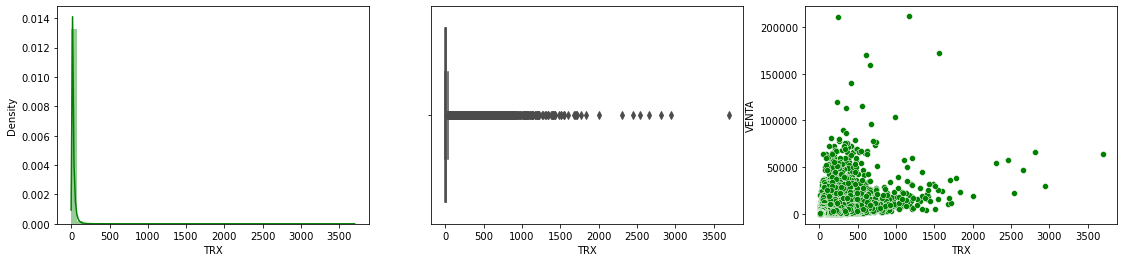

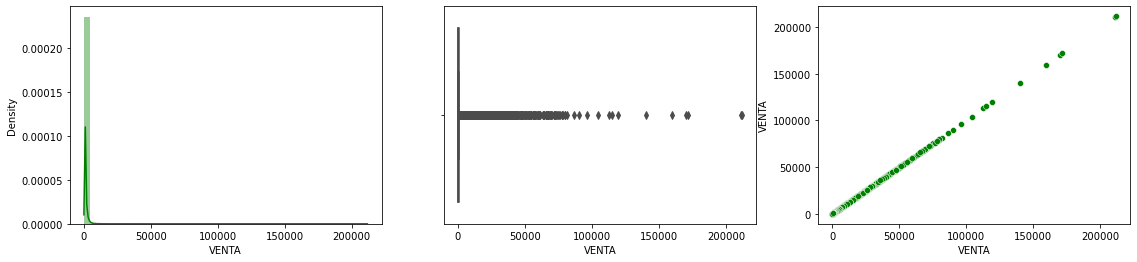

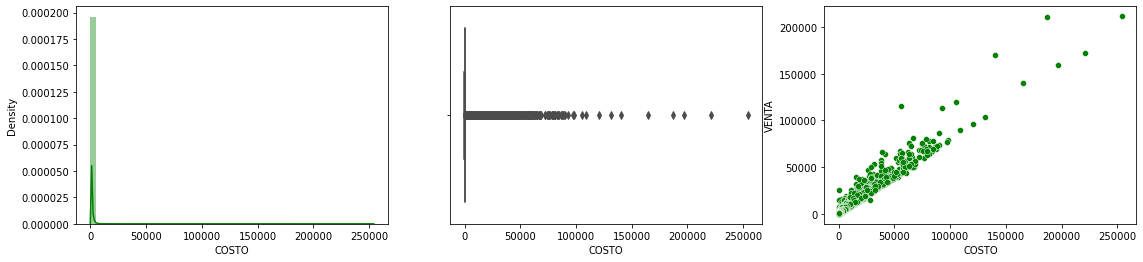

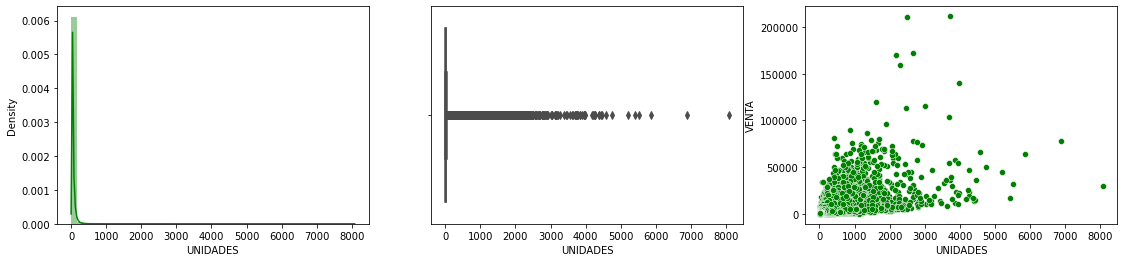

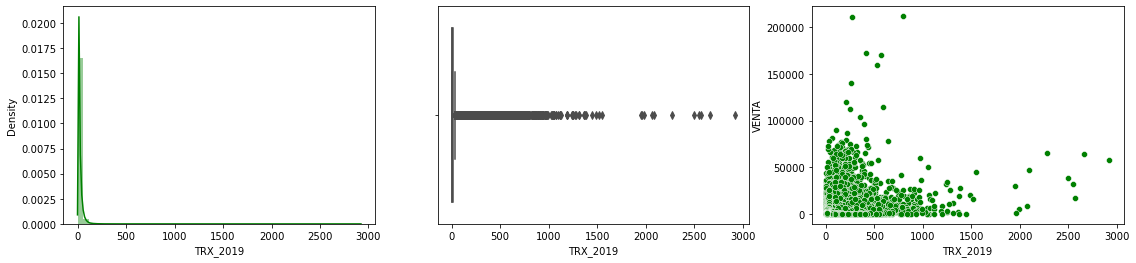

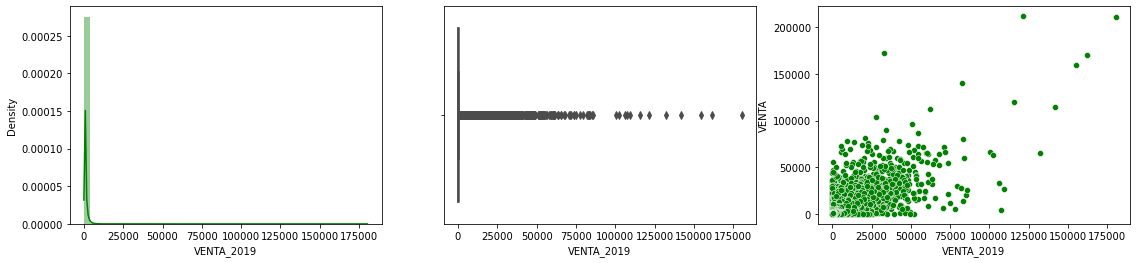

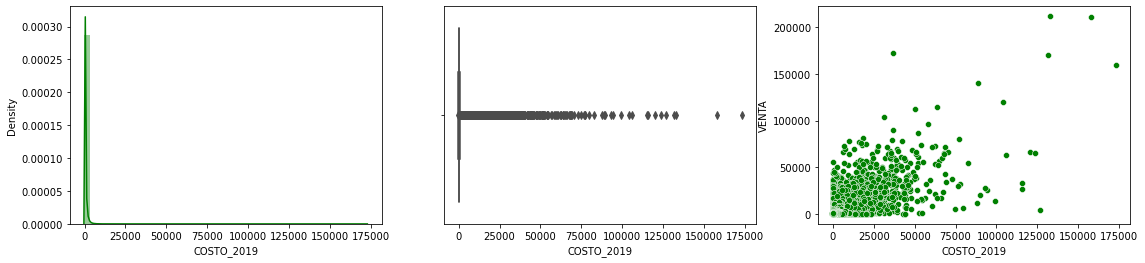

In [10]:
# plt.subplot(*nrows*, *ncols*, *index*)

for i in lista_1:
    fig, ax = plt.subplots(figsize = (19, 4))
    plt.subplot(1, 3, 1)
    sns.distplot(df[i], color = 'g')
        
    plt.subplot(1, 3, 2)
    sns.boxplot(df[i], color = 'blue')
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(x = df[i],
                    y = df['VENTA'],
                    color = 'g')

In [8]:
# Converting columns to numeric type

df["VENTA"] = pd.to_numeric(df["VENTA"])
df["COSTO"] = pd.to_numeric(df["COSTO"])
df["TRX"] = pd.to_numeric(df["TRX"])

df["VENTA_2019"] = pd.to_numeric(df["VENTA_2019"])
df["COSTO_2019"] = pd.to_numeric(df["COSTO_2019"])
df["TRX_2019"] = pd.to_numeric(df["TRX_2019"])

In [9]:
df_describe=df.describe().round(2)
df_describe

,TRX,VENTA,COSTO,UNIDADES,TRX_2019,VENTA_2019,COSTO_2019
count,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00
mean,13.17,332.93,239.40,23.05,12.59,320.64,226.51
std,21.49,764.22,666.34,42.04,21.08,755.78,622.14
min,1.00,-0.00,-85.63,1.00,0.00,0.00,-364.33
25%,2.00,35.85,18.80,4.00,1.00,15.50,6.85
50%,6.00,114.87,69.20,10.00,6.00,98.00,57.20
75%,16.00,335.14,220.28,27.00,16.00,325.84,210.09
max,3698.00,211496.94,254270.76,8078.00,2921.00,180304.47,172898.90


In [10]:
# Adding the Variation Coefficient to the describe table
# Agregando el Coeficiente de variación a la tabla describe

describe_T=df_describe.T
describe_T['CV']=describe_T['std']/describe_T['mean']
df_describe=describe_T.T
df_describe.round(2)

,TRX,VENTA,COSTO,UNIDADES,TRX_2019,VENTA_2019,COSTO_2019
count,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00,11055268.00
mean,13.17,332.93,239.40,23.05,12.59,320.64,226.51
std,21.49,764.22,666.34,42.04,21.08,755.78,622.14
min,1.00,-0.00,-85.63,1.00,0.00,0.00,-364.33
25%,2.00,35.85,18.80,4.00,1.00,15.50,6.85
50%,6.00,114.87,69.20,10.00,6.00,98.00,57.20
75%,16.00,335.14,220.28,27.00,16.00,325.84,210.09
max,3698.00,211496.94,254270.76,8078.00,2921.00,180304.47,172898.90
CV,1.63,2.30,2.78,1.82,1.67,2.36,2.75


In [12]:
# CV in TRX is more stable (Interquartile Range Rule) small: 1.5 extreme: 3.0
# CV en TRX es mas estable (Interquartile Range Rule) leve:1.5   extremo:3.0

IQR=df_describe.loc['75%','TRX']-df_describe.loc['25%','TRX']
limite_superior=df_describe.loc['75%','TRX']+3*IQR
limite_superior

58.0

In [14]:
# Filtering the DB to not consider possible outliers
# Filtrando la BD para no considerar posibles outliers

df_sin_outliers=df[df['TRX']<=limite_superior]

df_sin_outliers.describe().round()

,TRX,VENTA,COSTO,UNIDADES,TRX_2019,VENTA_2019,COSTO_2019
count,10692058.0,10692058.0,10692058.0,10692058.0,10692058.0,10692058.0,10692058.0
mean,10.0,261.0,184.0,18.0,10.0,263.0,183.0
std,12.0,444.0,361.0,22.0,14.0,516.0,413.0
min,1.0,-0.0,-86.0,1.0,0.0,0.0,-364.0
25%,2.0,34.0,18.0,3.0,1.0,14.0,6.0
50%,6.0,107.0,64.0,9.0,5.0,90.0,52.0
75%,14.0,299.0,195.0,24.0,14.0,292.0,187.0
max,58.0,64154.0,54556.0,668.0,1445.0,77854.0,79771.0


<AxesSubplot:xlabel='TRX'>

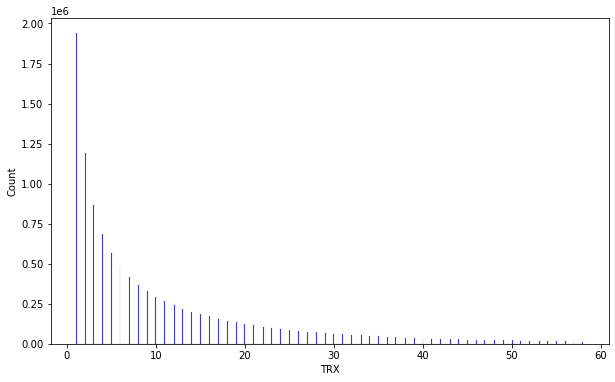

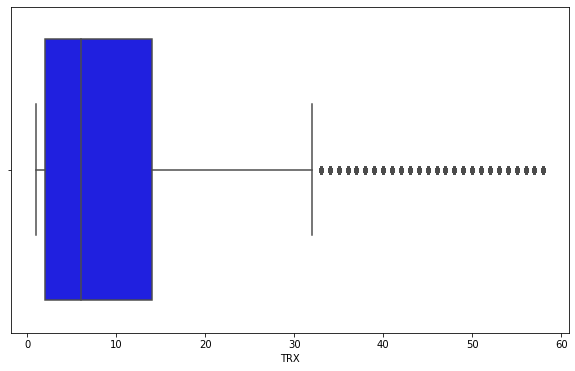

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(df_sin_outliers.loc[:,'TRX'], color = 'blue')

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(df_sin_outliers.loc[:,'TRX'], color = 'blue')

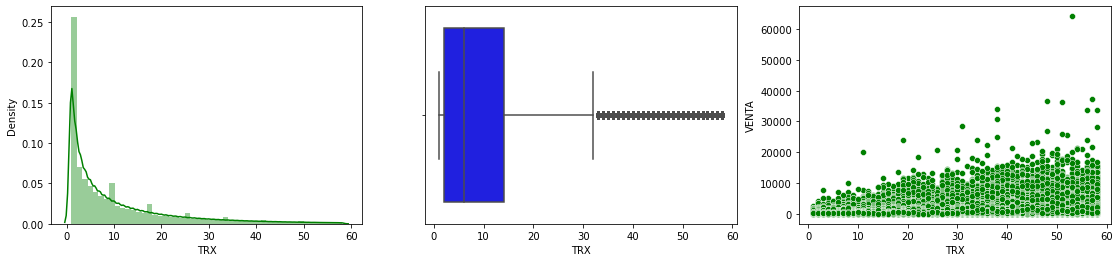

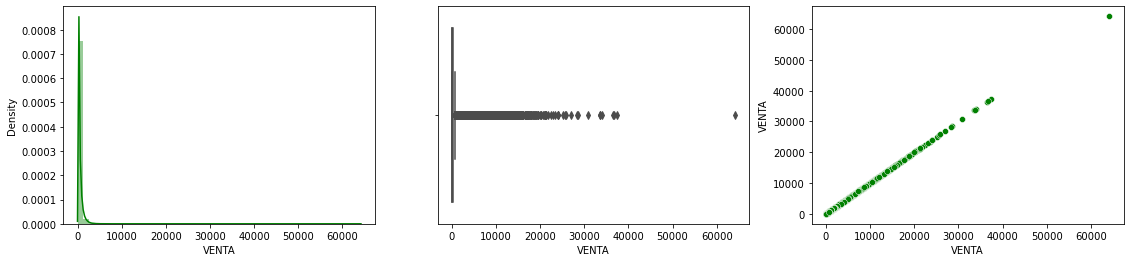

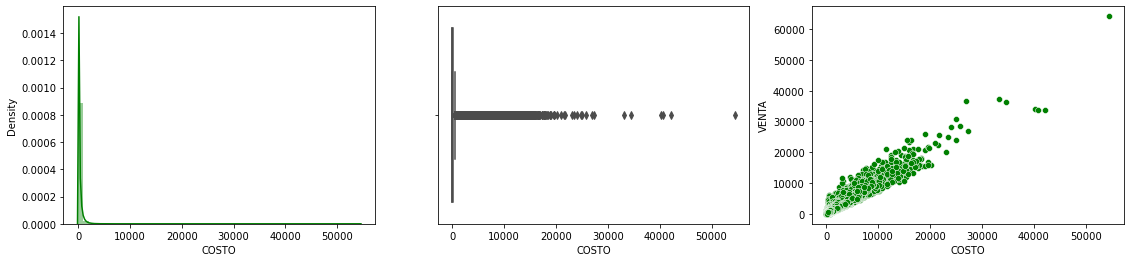

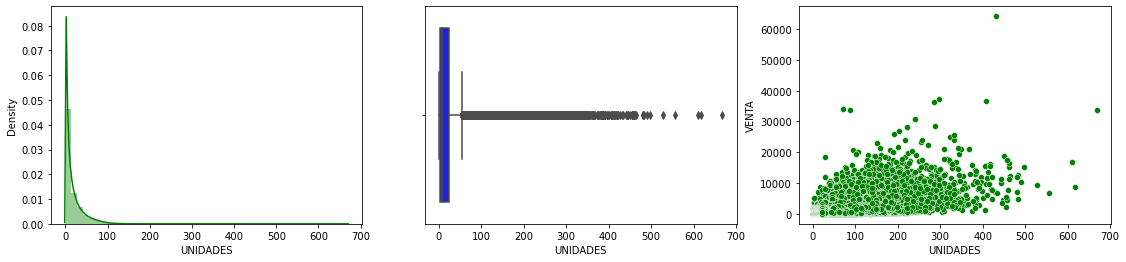

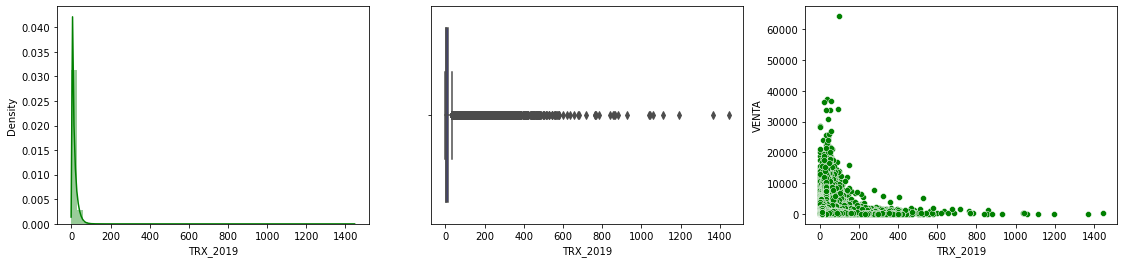

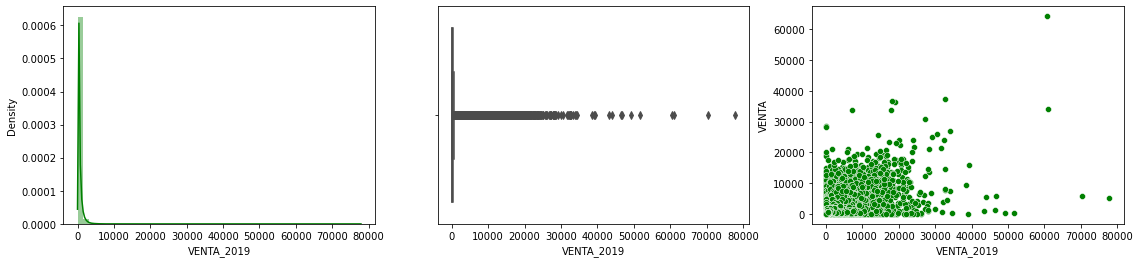

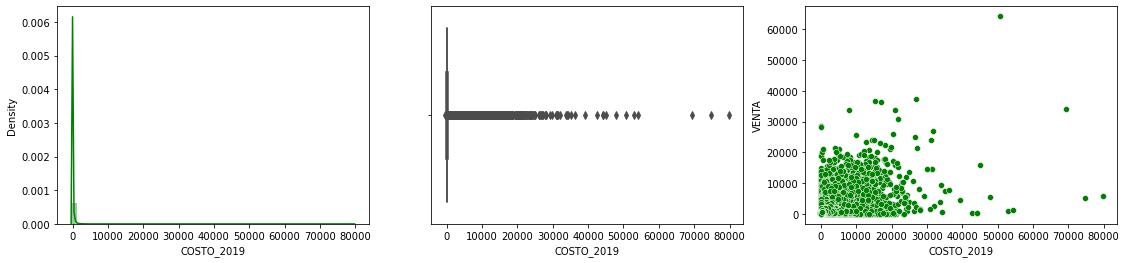

In [16]:
# plt.subplot(*nrows*, *ncols*, *index*)

for i in lista_1:
    fig, ax = plt.subplots(figsize = (19, 4))
    plt.subplot(1, 3, 1)
    sns.distplot(df_sin_outliers[i], color = 'g')
        
    plt.subplot(1, 3, 2)
    sns.boxplot(df_sin_outliers[i], color = 'blue')
    
    plt.subplot(1, 3, 3)
    sns.scatterplot(x = df_sin_outliers[i],
                    y = df_sin_outliers['VENTA'],
                    color = 'g')

In [17]:
df_sin_outliers.head()

,CLIENTE_ID,COMPRA_1,ULTIMA_COMP,TRX,VENTA,COSTO,UNIDADES,COMPRA_1_2019,ULTIMA_COMP_2019,TRX_2019,VENTA_2019,COSTO_2019
0,00CE2462,2018-01-22,2018-11-25,18,173.059322,80.532100,30,2019-03-24,2019-10-21,5.0,133.728814,82.380000
1,G0C02G24,2018-01-26,2018-12-02,16,160.838983,63.329703,30,2019-02-19,2019-06-25,5.0,19.855932,6.978640
2,0GGG0062,2018-02-17,2018-11-28,17,344.677966,252.767623,30,2019-03-25,2019-12-08,5.0,201.172542,230.770714
3,8C0408AI,2018-02-02,2018-12-18,17,560.974576,381.400367,30,2019-06-18,2019-10-02,5.0,142.254237,95.119890
4,80IAC06A,2018-01-24,2018-12-07,19,1199.940678,771.335700,30,2019-01-21,2019-11-05,5.0,153.974576,71.397667


In [18]:
# Calculating the variables needed for the CLV Aggregate Model
# shape can be used because no client is repeated, the table is at the level of clients, not trx

# Calculando las variables necesarias para el Modelo Agregado de CLV
# se puede usar shape pues ningún cliente se repite, la tabla esta a nivel de clientes no de trx

venta_promedio    = df_sin_outliers['VENTA'].sum()/df_sin_outliers['TRX'].sum()
frecuencia_compra = df_sin_outliers['TRX'].sum()/df_sin_outliers['CLIENTE_ID'].nunique()
tasa_retencion    = df_sin_outliers[df_sin_outliers['TRX']>1].shape[0]/df_sin_outliers.shape[0]
margen_promedio   = (df_sin_outliers['VENTA'].sum()-df_sin_outliers['COSTO'].sum())/df_sin_outliers['VENTA'].sum()
tasa_abandono     = 1- tasa_retencion

In [22]:
print('venta_promedio    : ' + str(venta_promedio))    # average_sale
print('frecuencia_compra : ' + str(frecuencia_compra)) # purchase_frequency
print('tasa_retencion    : ' + str(tasa_retencion))    # retention_rate
print('margen_promedio   : ' + str(margen_promedio))   # average_margin
print('tasa_abandono     : ' + str(tasa_abandono))     # Churn_rate

venta_promedio    : 25.16336858809886
frecuencia_compra : 10.381766447581935
tasa_retencion    : 0.8186161167475896
margen_promedio   : 0.29678535106942455
tasa_abandono     : 0.1813838832524104


In [23]:
# Calculating the aggregate CLV
# Calculando el CLV agregado

CLV= (average_sale*purchase_frequency/Churn_rate)*average_margin
CLV

427.44850173293065